# 1 Predição de pagamento de empréstimos

# Importando os pacotes

In [86]:
import pandas as pd # Utilização de datasets
import matplotlib.pyplot as plt # Visualização dos gráficos
import numpy as np # Utilização de analise de dados
from sklearn.preprocessing import StandardScaler # Normalização dados
import seaborn as sns
# Modelos e Analises
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [87]:
# Importando o Dataset e atribuindo as variáveis, conforme a Tabela 1: Esquema do conjunto de dados com histórico de clientes.
# O conjunto de dados a ser utilizado para treinamento(treino) e testes(testes).

In [88]:
column_names = ['Esct','Ndep','Renda', 'Tipor', 'Vbem', 'Nparc', 'Vparc', 'Tel', 'Idade', 'Resms', 'Entrada', 'Classe']

df_treino = pd.read_table('https://raw.githubusercontent.com/MLRG-CEFET-RJ/cic1205/main/data/credtrain.txt', names=column_names, header=None)

df_teste = pd.read_table('https://raw.githubusercontent.com/MLRG-CEFET-RJ/cic1205/main/data/credtest.txt', names=column_names, header=None)


In [89]:
# Validando o tamanho dos dataset's
df_treino.shape, df_teste.shape

((1500, 12), (577, 12))

In [90]:
df_treino.head(4)

,Esct,Ndep,Renda,Tipor,Vbem,Nparc,Vparc,Tel,Idade,Resms,Entrada,Classe
0,1,0,360,0,313,9,52,0,25,48,0,1
1,0,0,350,1,468,10,65,0,33,6,0,1
2,0,0,1100,0,829,9,125,0,56,48,0,1
3,0,0,3000,0,552,12,76,1,31,60,0,1


In [91]:
df_teste.head(4)

,Esct,Ndep,Renda,Tipor,Vbem,Nparc,Vparc,Tel,Idade,Resms,Entrada,Classe
0,0,2,500,1,618,10,85,0,36,6,0,0
1,1,0,813,0,552,4,119,0,43,48,119,1
2,3,0,350,0,488,12,66,0,43,0,0,1
3,1,0,1530,0,381,1,398,0,28,48,0,1


In [92]:
df_treino.isnull().sum().sum() #checando a existência de valores nulos
df_teste.isnull().sum().sum()

0

In [93]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Esct     1500 non-null   int64
 1   Ndep     1500 non-null   int64
 2   Renda    1500 non-null   int64
 3   Tipor    1500 non-null   int64
 4   Vbem     1500 non-null   int64
 5   Nparc    1500 non-null   int64
 6   Vparc    1500 non-null   int64
 7   Tel      1500 non-null   int64
 8   Idade    1500 non-null   int64
 9   Resms    1500 non-null   int64
 10  Entrada  1500 non-null   int64
 11  Classe   1500 non-null   int64
dtypes: int64(12)
memory usage: 140.8 KB


#Transformando variáveis categóricas.

O dataset está com as variáveis classificadas como inteiro, entretanto, sabemos pelo enunciado do exercício que as variáveis: Esct (Estado Civil), Ndep (Número de dependentes) e Tipor(Tipo de residência) são variáveis categóricas. A variável Esct não tem uma ordem específica, ou seja, 2 não é o dobro de 1 no estado civil. Isso pode ser um problema em alguns modelos, pois modelos de redes neurais não podem ser treinados sobre atributos que não são numéricos. Para resolver esse problema, transformaremos essa variavel em variáveis "dummy", neste caso em 4. Para as variáveis Tipor e Ndep, não há essa necessidade. 


In [94]:
df_treino = pd.get_dummies(data=df_treino, prefix="Esct", columns=["Esct"], drop_first=True)

df_teste = pd.get_dummies(data=df_teste, prefix="Esct", columns=["Esct"], drop_first=True)


In [95]:
df_treino.head(5)

,Ndep,Renda,Tipor,Vbem,Nparc,Vparc,Tel,Idade,Resms,Entrada,Classe,Esct_1,Esct_2,Esct_3
0,0,360,0,313,9,52,0,25,48,0,1,True,False,False
1,0,350,1,468,10,65,0,33,6,0,1,False,False,False
2,0,1100,0,829,9,125,0,56,48,0,1,False,False,False
3,0,3000,0,552,12,76,1,31,60,0,1,False,False,False
4,0,1000,0,809,12,111,0,24,7,0,1,True,False,False


In [96]:
df_teste.head(5)

,Ndep,Renda,Tipor,Vbem,Nparc,Vparc,Tel,Idade,Resms,Entrada,Classe,Esct_1,Esct_2,Esct_3
0,2,500,1,618,10,85,0,36,6,0,0,False,False,False
1,0,813,0,552,4,119,0,43,48,119,1,True,False,False
2,0,350,0,488,12,66,0,43,0,0,1,False,False,True
3,0,1530,0,381,1,398,0,28,48,0,1,True,False,False
4,0,688,1,396,10,60,0,49,72,0,1,False,False,False


Renda         Axes(0.125,0.11;0.0945122x0.77)
Vbem       Axes(0.238415,0.11;0.0945122x0.77)
Nparc      Axes(0.351829,0.11;0.0945122x0.77)
Vparc      Axes(0.465244,0.11;0.0945122x0.77)
Idade      Axes(0.578659,0.11;0.0945122x0.77)
Resms      Axes(0.692073,0.11;0.0945122x0.77)
Entrada    Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

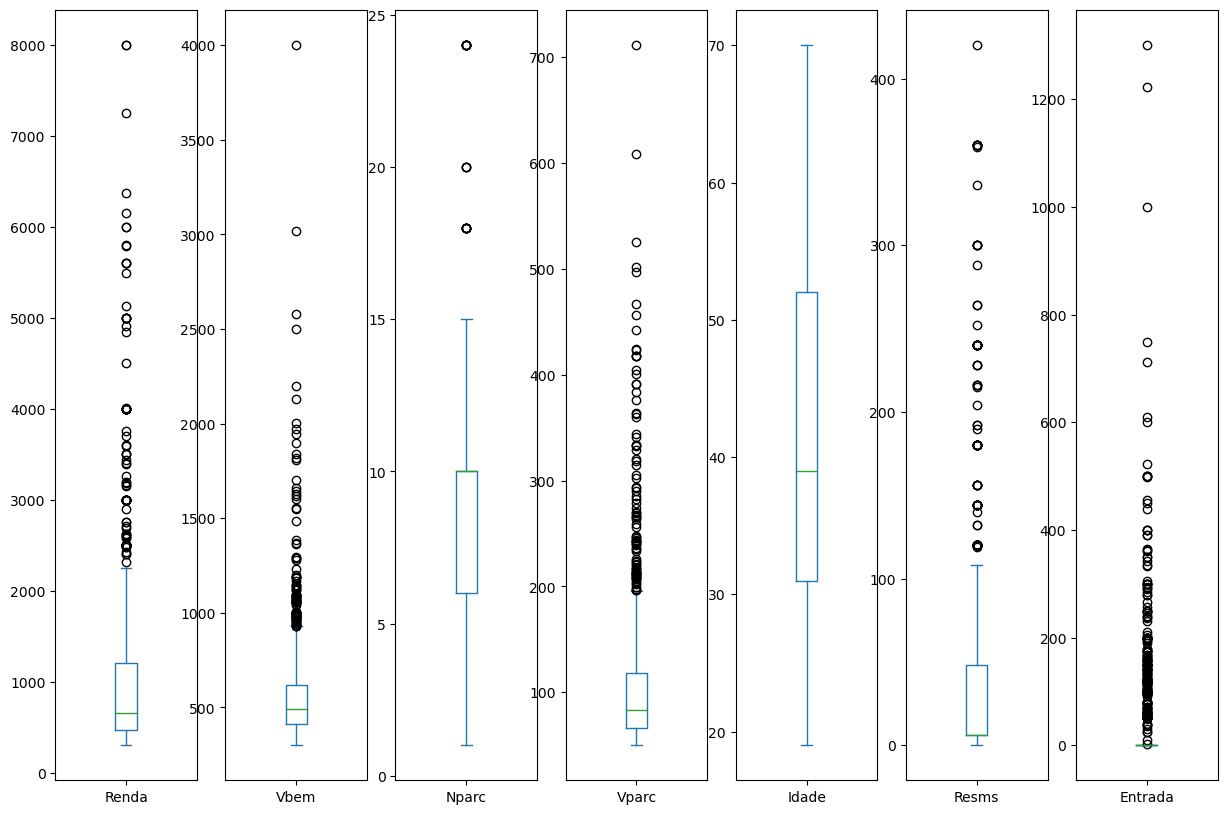

In [97]:
# Avaliando a variabilidade entre as variáveis numéricas: Ficando evidente a grande quantidade de outliers, justificando a normalização.

boxplot_colunas = ['Renda', 'Vbem', 'Nparc', 'Vparc', 'Idade', 'Resms', 'Entrada']
df_treino[boxplot_colunas].plot(kind='box', subplots=True, figsize= (15,10))

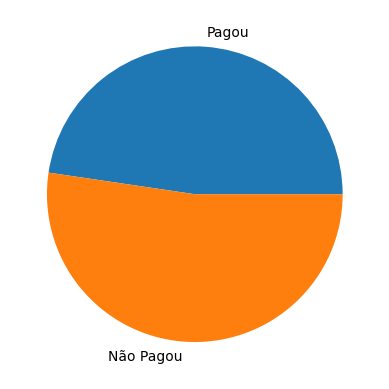

In [98]:
class_division = [ df_treino[df_treino['Classe'] == 1 ].shape[0], df_treino[df_treino['Classe'] == 0 ].shape[0] ]
my_labels = ['Pagou', 'Não Pagou']

plt.pie(class_division, labels = my_labels)
plt.show()

In [99]:
print(
    "Proporção de Adimplentes: "
    + str(round(df_treino[df_treino['Classe'] == 1].shape[0] / df_treino.shape[0] * 100, 2))
    + "%"
)
print(
    "Proporção de Inadimplentes: "
    + str(round(df_treino[df_treino['Classe'] == 0].shape[0] / df_treino.shape[0] * 100, 2))
    + "%"
)



Proporção de Adimplentes: 47.67%
Proporção de Inadimplentes: 52.33%


In [100]:
# Ajustando os conjuntos de treinamento e teste.

X_treino = df_treino.drop('Classe', axis=1)
X_treino = np.array(X_treino).astype(float)
Y_treino = df_treino['Classe']

X_teste = df_teste.drop('Classe', axis=1)
X_teste = np.array(X_teste).astype(float)
Y_teste = df_teste['Classe']

In [101]:
#Normalização

norm = StandardScaler()

X_treino = norm.fit_transform(X_treino)
X_teste = norm.transform(X_teste)

print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(1500, 13) (577, 13) (1500,) (577,)


In [102]:
# Criar e treinar modelos 

RegLog = LogisticRegression()
RegLog.fit(X_treino, Y_treino)

ArvDec = DecisionTreeClassifier()
ArvDec.fit(X_treino, Y_treino)

FloAle = RandomForestClassifier()
FloAle.fit(X_treino, Y_treino)

VK = KNeighborsClassifier()
VK.fit(X_treino, Y_treino)

GB = GradientBoostingClassifier()
GB.fit(X_treino, Y_treino)

GradientBoostingClassifier()

In [103]:
Y_pred_RegLog = RegLog.predict(X_teste)

# Avaliação dos modelos
accuracy = accuracy_score(Y_teste, Y_pred_RegLog)
confusion = confusion_matrix(Y_teste, Y_pred_RegLog)
classification_rep = classification_report(Y_teste, Y_pred_RegLog)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Matrix Confusão:\n", confusion)
print("Regressão Logística:\n", classification_rep)

Accuracy: 88.73%
Matrix Confusão:
 [[290  16]
 [ 49 222]]
Regressão Logística:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       306
           1       0.93      0.82      0.87       271

    accuracy                           0.89       577
   macro avg       0.89      0.88      0.89       577
weighted avg       0.89      0.89      0.89       577



In [104]:
Y_pred_ArvDec = ArvDec.predict(X_teste)

# Avaliação dos modelos
accuracy = accuracy_score(Y_teste, Y_pred_ArvDec)
confusion = confusion_matrix(Y_teste, Y_pred_ArvDec)
classification_rep = classification_report(Y_teste, Y_pred_ArvDec)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Matrix Confusão:\n", confusion)
print("Árvore Decisão:\n", classification_rep)

Accuracy: 85.27%
Matrix Confusão:
 [[258  48]
 [ 37 234]]
Árvore Decisão:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       306
           1       0.83      0.86      0.85       271

    accuracy                           0.85       577
   macro avg       0.85      0.85      0.85       577
weighted avg       0.85      0.85      0.85       577



In [105]:
Y_pred_FloAle = FloAle.predict(X_teste)

# Avaliação dos modelos
accuracy = accuracy_score(Y_teste, Y_pred_FloAle)
confusion = confusion_matrix(Y_teste, Y_pred_FloAle)
classification_rep = classification_report(Y_teste, Y_pred_FloAle)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Matrix Confusão:\n", confusion)
print("Floresta Aleatória:\n", classification_rep)

Accuracy: 89.77%
Matrix Confusão:
 [[294  12]
 [ 47 224]]
Floresta Aleatória:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       306
           1       0.95      0.83      0.88       271

    accuracy                           0.90       577
   macro avg       0.91      0.89      0.90       577
weighted avg       0.90      0.90      0.90       577



In [106]:
Y_pred_VK = VK.predict(X_teste)

# Avaliação dos modelos
accuracy = accuracy_score(Y_teste, Y_pred_VK)
confusion = confusion_matrix(Y_teste, Y_pred_VK)
classification_rep = classification_report(Y_teste, Y_pred_VK)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Matrix Confusão:\n", confusion)
print("K - Vizinhos:\n", classification_rep)

Accuracy: 86.31%
Matrix Confusão:
 [[281  25]
 [ 54 217]]
K - Vizinhos:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       306
           1       0.90      0.80      0.85       271

    accuracy                           0.86       577
   macro avg       0.87      0.86      0.86       577
weighted avg       0.87      0.86      0.86       577



In [107]:
Y_pred_GB = GB.predict(X_teste)

# Avaliação dos modelos
accuracy = accuracy_score(Y_teste, Y_pred_GB )
confusion = confusion_matrix(Y_teste, Y_pred_GB )
classification_rep = classification_report(Y_teste, Y_pred_GB)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Matrix Confusão:\n", confusion)
print("Gradient Boosting:\n", classification_rep)

#cm_norm = np.array(confusion) / np.sum(confusion)
#sns.heatmap(cm_norm, annot=True, fmt=".1%", cmap="cool")
#plt.show()

Accuracy: 90.12%
Matrix Confusão:
 [[296  10]
 [ 47 224]]
Gradient Boosting:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       306
           1       0.96      0.83      0.89       271

    accuracy                           0.90       577
   macro avg       0.91      0.90      0.90       577
weighted avg       0.91      0.90      0.90       577

